<link rel='stylesheet' href='../assets/css/main.css'/>

[<< back to main index](../README.md)

# Multiple Linear Regression Lab 5 : House Prices

### Overview
Estimate house prices using MLR

### Builds on
None

### Run time
approx. 20 minutes

### Notes



In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


## Step 1 : House data

In [2]:
housePrices = pd.read_csv("https://s3.amazonaws.com/elephantscale-public/data/house-prices/house-sales-full.csv")
housePrices.head(5)

DocumentID     Date  SalePrice  PropertyID   PropertyType      ym  zhvi_px  \
0           1  9/16/14     280000     1000102      Multiplex  9/1/14   405100   
1           2  6/16/06    1000000     1200013  Single Family  6/1/06   404400   
2           3  1/29/07     745000     1200019  Single Family  1/1/07   425600   
3           4  2/25/08     425000     2800016  Single Family  2/1/08   418400   
4           5  3/29/13     240000     2800024  Single Family  3/1/13   351600   

   zhvi_idx  AdjSalePrice  NbrLivingUnits       ...         Bathrooms  \
0  0.930836      300805.0               2       ...              3.00   
1  0.929228     1076162.0               1       ...              3.75   
2  0.977941      761805.0               1       ...              1.75   
3  0.961397      442065.0               1       ...              3.75   
4  0.807904      297065.0               1       ...              1.75   

   Bedrooms  BldgGrade  YrBuilt  YrRenovated  TrafficNoise  LandVal  ImpsVal  \
0         6          7     1991            0             0    70000   229000   
1         4         10     2005            0             0   203000   590000   
2         4          8     1947            0             0   183000   275000   
3         5          7     1966            0             0   104000   229000   
4         4          7     1948            0             0   104000   205000   

   ZipCode  NewConstruction  
0    98002            False  
1    98166             True  
2    98166            False  
3    98168            False  
4    98168            False  

[5 rows x 23 columns]

In [3]:
housePrices.columns

Index(['DocumentID', 'Date', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

Wow! That's a lot of columns.  Maybe we should foucs on just a few of them.

**=> Select only "SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot" **

In [4]:
# TODO: select only "SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot"
housePrices_small = housePrices[["SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot"]]


housePrices_small.head(5)

SalePrice  Bedrooms  Bathrooms  SqFtTotLiving  SqFtLot
0     280000         6       3.00           2400     9373
1    1000000         4       3.75           3764    20156
2     745000         4       1.75           2060    26036
3     425000         5       3.75           3200     8618
4     240000         4       1.75           1720     8620

## Step 2: Create Features and Label Column in Dataframe

We will create our "features" column, which is of type vector, and our label column, for which we can just reuse the SquareFootage column.

**=> Build features with  "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot" **

**=> Rename SalePrice as "label" **



In [0]:

features = ["Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot"]
fv = housePrices_small[features].values
labels = housePrices_small["SalePrice"].values

##  Step 3: Run the Linear Regression Model

**=> Run model with max iterations as 10, regParam=0.3, elasticNetParam=0.8 **


In [6]:
## Step 3: Run the Linear Regression Model
lr = LinearRegression()
lrModel = lr.fit(fv, labels)

print("Coefficients: " + str(lrModel.coef_))
print("Intercept: " + str(lrModel.intercept_))

Coefficients: [-6.52117361e+04  1.62741914e+04  2.77848047e+02 -7.45705406e-02]
Intercept: 106303.30611504376


**=> What is the meaning of coefficients and intercept? **

In [0]:
from sklearn.metrics import classification_report



In [7]:
#from sklearn.metrics import classification_report ##Can't use classification_report, its for classification_report problems
housePrices_small['predicted_SalePrice'] = lrModel.predict(fv)

from sklearn.metrics import mean_squared_error, r2_score
print("mse = ", mean_squared_error(housePrices_small['SalePrice'], housePrices_small['predicted_SalePrice']))
print("r2 = " , r2_score(housePrices_small['SalePrice'], housePrices_small['predicted_SalePrice']))

mse =  60702204448.745056
r2 =  0.483482252362197


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


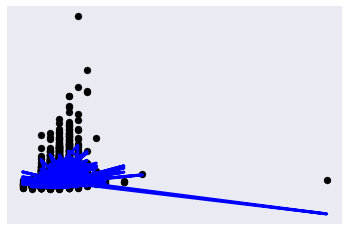

In [8]:
# Plot outputs
plt.scatter(housePrices_small['Bedrooms'], housePrices_small['SalePrice'],  color='black')
plt.plot(housePrices_small['Bedrooms'], housePrices_small['predicted_SalePrice'], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [9]:
# Plot outputs
plt.scatter(housePrices_small['SqFtLot'], housePrices_small['SalePrice'],  color='black')
plt.plot(housePrices_small['SqFtLot'], housePrices_small['predicted_SalePrice'], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**Observe the summary output**

## Step 4:  Predict some home prices
Create a new data frame with the following data

In [10]:

# Make a Pandas dataframe
new_data = pd.DataFrame({'Bedrooms' : [5,3,2],
                         'Bathrooms' : [3,2,1.5],
                         'SqFtTotLiving' : [4400, 1800, 1550],
                         'SqFtLot' : [10000, 5000, 4000]
             })

new_data




Bathrooms  Bedrooms  SqFtLot  SqFtTotLiving
0        3.0         5    10000           4400
1        2.0         3     5000           1800
2        1.5         2     4000           1550

## Step 4: Run on some prediction data

Lets see the predicted output.

**=>TODO: transform dataframe with new dataframe (.values) to get predictions **

In [11]:
predicted_prices = lrModel.predict(new_data.values)
new_data['predicted_prices'] = predicted_prices
new_data

Bathrooms  Bedrooms  SqFtLot  SqFtTotLiving  predicted_prices
0        3.0         5    10000           4400      2.770191e+06
1        2.0         3     5000           1800      1.413808e+06
2        1.5         2     4000           1550      1.152311e+06

## **Final Examination**

**Step1**

Go back to the house price prediction lab and rerun it

1.  Analyze the results. You will see some irregularities. Some coefficients in the model will be negative.

2.For example, the price of the house will drop when the number of bedrooms increases.

3.Investigate the problem. Is the data at fault or the model at fault?

4.Hint: Using Python visualization, plot the price vs number of bedrooms

5.Hint: Run cross-correlations between variables. What do you find?

6.If you find that the data is at fault, find the way to detect dirty data and clean it

7.Having removed the outliers, clean the data and verify that the predictions that you now have made agree with common sense and your expectations

The co-efficients seems to be negative, let's try to plot them.

Plot Bedrooms vs SalePrice

In [15]:
#Plot Bedrooms vs SalePrice
sns.regplot(x="Bedrooms", y="SalePrice", data=housePrices_small)

Clearly there are some outliers that are pulling the co-eff as negative

In [16]:
#Print cross corelation

housePrices_small[features].corr()

Bedrooms  Bathrooms  SqFtTotLiving   SqFtLot
Bedrooms       1.000000   0.534817       0.618345  0.079361
Bathrooms      0.534817   1.000000       0.749759  0.103723
SqFtTotLiving  0.618345   0.749759       1.000000  0.207260
SqFtLot        0.079361   0.103723       0.207260  1.000000

SqFtLot and SqFtTotLiving are very less co-related SqFtLot and Bedrooms are less co-related as well

Other variables have high co-relation.

Let's try to clean the data

In [17]:
housePrices_clean = housePrices.dropna()
housePrices_clean = housePrices_clean[["SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot"]]
# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(housePrices_clean)

scaled_df = pd.DataFrame(scaled_data, columns=["SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot"])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
fv = scaled_df[features].values
labels = scaled_df["SalePrice"].values

## Step 3: Run the Linear Regression Model
lr = LinearRegression()
lrModel = lr.fit(fv, labels)

print("Coefficients: " + str(lrModel.coef_))
print("Intercept: " + str(lrModel.intercept_))

scaled_df['predicted_SalePrice'] = lrModel.predict(fv)

from sklearn.metrics import mean_squared_error, r2_score
print("mse = ", mean_squared_error(scaled_df['SalePrice'], scaled_df['predicted_SalePrice']))
print("r2 = " , r2_score(scaled_df['SalePrice'], scaled_df['predicted_SalePrice']))

Coefficients: [-0.17033277  0.03660949  0.76171656 -0.00611464]
Intercept: 1.3341666693327334e-16
mse =  0.516517747637803
r2 =  0.4834822523621969


Previous values were:

Coefficients: [-6.52117361e+04 1.62741914e+04 2.77848047e+02 -7.45705406e-02] Intercept: 106303.30611504376

mse = 60702204448.745056 r2 = 0.483482252362197

After scaling and removing outliers, the mse has significantly reduced. The Coeff are still negative, but now very near to zero and has significantly improved the model

Let's try plotting now!

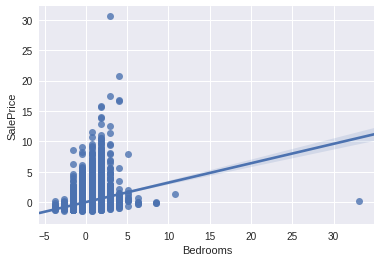

In [19]:
#Plot Bedrooms vs SalePrice
sns.regplot(x="Bedrooms", y="SalePrice", data=scaled_df)

In [20]:
#Plot SqFtLot vs SalePrice
sns.regplot(x="SqFtLot", y="SalePrice", data=scaled_df)

**STEP 2**

Investigate adding other predictors from the dataset
Can you achieve better accuracy? (If not, you have not resolved the challenge)
If you did achieve better accuracy, explain why and submit your results in the Python notebook

In [21]:
## Define columns
prediction = 'SalePrice'
categorical = ['NewConstruction', 'PropertyType', 'ZipCode']
categorical_index = ['NewConstruction_index',  'PropertyType_index', 'ZipCode_index']

columns = ["SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot", "LandVal"]
features = ["Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot", "LandVal"]

for column in categorical:
    housePrices[column + "_index"] = pd.factorize(housePrices[column])[0]

housePrices.head(5)

DocumentID     Date  SalePrice  PropertyID   PropertyType      ym  zhvi_px  \
0           1  9/16/14     280000     1000102      Multiplex  9/1/14   405100   
1           2  6/16/06    1000000     1200013  Single Family  6/1/06   404400   
2           3  1/29/07     745000     1200019  Single Family  1/1/07   425600   
3           4  2/25/08     425000     2800016  Single Family  2/1/08   418400   
4           5  3/29/13     240000     2800024  Single Family  3/1/13   351600   

   zhvi_idx  AdjSalePrice  NbrLivingUnits      ...        YrBuilt  \
0  0.930836      300805.0               2      ...           1991   
1  0.929228     1076162.0               1      ...           2005   
2  0.977941      761805.0               1      ...           1947   
3  0.961397      442065.0               1      ...           1966   
4  0.807904      297065.0               1      ...           1948   

   YrRenovated  TrafficNoise  LandVal  ImpsVal  ZipCode  NewConstruction  \
0            0             0    70000   229000    98002            False   
1            0             0   203000   590000    98166             True   
2            0             0   183000   275000    98166            False   
3            0             0   104000   229000    98168            False   
4            0             0   104000   205000    98168            False   

   NewConstruction_index  PropertyType_index  ZipCode_index  
0                      0                   0              0  
1                      1                   1              1  
2                      0                   1              1  
3                      0                   1              2  
4                      0                   1              2  

[5 rows x 26 columns]

In [22]:
housePrices = housePrices.dropna()

# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(housePrices[columns + categorical_index])
scaled_df = pd.DataFrame(scaled_data, columns=[columns + categorical_index])

scaled_df.head(5)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


SalePrice  Bedrooms Bathrooms SqFtTotLiving   SqFtLot   LandVal  \
0 -0.675660  2.925798  0.965341      0.294776 -0.057797 -0.811579   
1  1.424599  0.692237  1.937880      1.746114  0.325801 -0.061058   
2  0.680758  0.692237 -0.655559     -0.066995  0.534978 -0.173918   
3 -0.252691  1.809017  1.937880      1.146001 -0.084656 -0.619717   
4 -0.792341  0.692237 -0.655559     -0.428765 -0.084584 -0.619717   

  NewConstruction_index PropertyType_index ZipCode_index  
0             -0.496267          -3.221713     -1.456601  
1              2.015043          -0.326985     -1.408668  
2             -0.496267          -0.326985     -1.408668  
3             -0.496267          -0.326985     -1.360735  
4             -0.496267          -0.326985     -1.360735

In [23]:
fv = scaled_df[features].values
labels = scaled_df[prediction].values

## Step 3: Run the Linear Regression Model
lr = LinearRegression()
lrModel = lr.fit(fv, labels)

print("Coefficients: " + str(lrModel.coef_))
print("Intercept: " + str(lrModel.intercept_))

scaled_df['predicted_SalePrice'] = lrModel.predict(fv)

from sklearn.metrics import mean_squared_error, r2_score
print("mse = ", mean_squared_error(scaled_df['SalePrice'], scaled_df['predicted_SalePrice']))
print("r2 = " , r2_score(scaled_df['SalePrice'], scaled_df['predicted_SalePrice']))

Coefficients: [[-0.10261574  0.10346481  0.38145948  0.00930469  0.60419141]]
Intercept: [1.38470138e-16]
mse =  0.2381848784325877
r2 =  0.7618151215674123


After including few categorical variables and LandValue, the MSE has reduced and r2 has increased significantly.

This simply means that there are other factors contributing to the Sale Price of the house

**STEP 3**

Use Random Forests for Regression and try to achieve better accuracy
Prove that you have indeed achieved better model quality
If you did achieve better accuracy, explain why and submit your results in the Python notebook

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [25]:
housePrices = pd.read_csv("https://s3.amazonaws.com/elephantscale-public/data/house-prices/house-sales-full.csv")
housePrices.head(5)

housePrices = housePrices.dropna()

## Define columns
prediction = 'SalePrice'

categorical = ['NewConstruction', 'PropertyType', 'ZipCode']
categorical_index = ['NewConstruction_index',  'PropertyType_index', 'ZipCode_index']

#categorical = ['ZipCode']
#categorical_index = ['ZipCode_index']


columns = ["SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot", "LandVal"]
features = ["Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot", "LandVal"]

for column in categorical:
    housePrices[column + "_index"] = pd.factorize(housePrices[column])[0]
    
# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(housePrices[columns + categorical_index])
scaled_df = pd.DataFrame(scaled_data, columns=[columns + categorical_index])

housePrices = scaled_df

housePrices.head(5)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


SalePrice  Bedrooms Bathrooms SqFtTotLiving   SqFtLot   LandVal  \
0 -0.675660  2.925798  0.965341      0.294776 -0.057797 -0.811579   
1  1.424599  0.692237  1.937880      1.746114  0.325801 -0.061058   
2  0.680758  0.692237 -0.655559     -0.066995  0.534978 -0.173918   
3 -0.252691  1.809017  1.937880      1.146001 -0.084656 -0.619717   
4 -0.792341  0.692237 -0.655559     -0.428765 -0.084584 -0.619717   

  NewConstruction_index PropertyType_index ZipCode_index  
0             -0.496267          -3.221713     -1.456601  
1              2.015043          -0.326985     -1.408668  
2             -0.496267          -0.326985     -1.408668  
3             -0.496267          -0.326985     -1.360735  
4             -0.496267          -0.326985     -1.360735

In [26]:
#train test split

features = housePrices[features + categorical_index] # numeric columns plus our *_index columns
label = housePrices[prediction] #  What are we trying to predict?

from sklearn.model_selection import train_test_split
train_x, test_x,train_y, test_y = train_test_split(features, label, test_size=0.2)

print("training set = " , len(train_x))
print("testing set = " , len(test_x))

training set =  21650
testing set =  5413


In [27]:
#Train the model

from sklearn.ensemble import RandomForestRegressor
import time

rf = RandomForestRegressor(n_estimators=20, oob_score=True)

print("Starting model training....this will take some time")
t1 = time.perf_counter()
## TODO : train the model with our training set
## Hint : training
rf.fit(train_x,train_y)
t2 = time.perf_counter()
print("trained on {:,} records  in {:,.2f} ms".\
      format(len(train_x),  (t2-t1)*1000))

t1 = time.perf_counter()
predictions = rf.predict(test_x)
t2 = time.perf_counter()
print("prediction on {:,} records  in {:,.2f} ms".\
      format(len(test_x),  (t2-t1)*1000))

predictions

Starting model training....this will take some time


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


trained on 21,650 records  in 1,922.77 ms
prediction on 5,413 records  in 48.53 ms


array([ 0.70630786,  0.83370762,  0.71129885, ..., -0.64627076,
        1.72054995,  0.32903709])

In [28]:
predictions = rf.predict(test_x)
predictions

array([ 0.70630786,  0.83370762,  0.71129885, ..., -0.64627076,
        1.72054995,  0.32903709])

In [29]:
rf.score(test_x, test_y)

0.797310503924048

In [30]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, rf.feature_importances_)]
pd.DataFrame(feature_importances)
pd.DataFrame(rf.feature_importances_, index=features.columns).plot.barh()

Accuracy has definitely improved to 80%

Clearly land value and sq ft to living are important factors for the model

**STEP 4**

All options are on the table

You can use any method from standard ML or Deep ML

You can transform the variables, like taking a logarithm or a power of predictors

The goal is to achieve the best possible quality

But watch for overfitting

In [31]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from IPython.display import Image
%matplotlib inline

housePrices = pd.read_csv("https://s3.amazonaws.com/elephantscale-public/data/house-prices/house-sales-full.csv")
housePrices.head(5)

housePrices = housePrices.dropna()

## Define columns
prediction = 'SalePrice'

categorical = ['NewConstruction', 'PropertyType', 'ZipCode']
categorical_index = ['NewConstruction_index',  'PropertyType_index', 'ZipCode_index']

#categorical = ['ZipCode']
#categorical_index = ['ZipCode_index']


columns = ["SalePrice", "Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot", "LandVal"]
features = ["Bedrooms", "Bathrooms", "SqFtTotLiving", "SqFtLot", "LandVal"]

for column in categorical:
    housePrices[column + "_index"] = pd.factorize(housePrices[column])[0]
    
# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(housePrices[columns + categorical_index])
scaled_df = pd.DataFrame(scaled_data, columns=[columns + categorical_index])

housePrices = scaled_df

#train test split

features = housePrices[features + categorical_index] # numeric columns plus our *_index columns
label = housePrices[prediction] #  What are we trying to predict?

from sklearn.model_selection import train_test_split
train_x, test_x,train_y, test_y = train_test_split(features, label, test_size=0.2)

print("training set = " , len(train_x))
print("testing set = " , len(test_x))

training set =  21650
testing set =  5413


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1) # 1 output
])

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

model.fit(train_x.values, train_y.values, epochs=10)

model.evaluate(test_x.values, test_y.values)

model.summary() #Print model Summary

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
21650/21650 [==============================] - 1s 62us/sample - loss: 0.2478 - mean_squared_error: 0.2478
Epoch 2/10
21650/21650 [==============================] - 1s 51us/sample - loss: 0.2138 - mean_squared_error: 0.2138
Epoch 3/10
21650/21650 [==============================] - 1s 48us/sample - loss: 0.2033 - mean_squared_error: 0.2033
Epoch 4/10
21650/21650 [==============================] - 1s 48us/sample - loss: 0.2046 - mean_squared_error: 0.2046
Epoch 5/10
21650/21650 [==============================] - 1s 47us/sample - loss: 0.2014 - mean_squared_error: 0.2014
Epoch 6/10
21650/21650 [==============================] - 1s 48us/sample - loss: 0.1959 - mean_squared_error: 0.1959
Epoch 7/10
21650/21650 [==============================] - 1s 41us/sample - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 8/10
21

Loss is 0.18 and MSE is 0.18 as well which seems good.